In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('played_out_cleaned.csv', index_col=0)


In [4]:
df.keys()

Index(['position', 'played_at', 'duration_ms', 'explicit', 'track_id',
       'track_name', 'popularity', 'first_genre', 'user', 'gender', 'age',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'artist'],
      dtype='object')

# Analysis

# testing on a single user data

In [7]:
sample = df[df['user'] == 'b3a05964788f4433a57a6113f54418e2_AnirudhParameswaran'].sort_values(by='position', ascending=True).reset_index(drop=True)
sample.head() # (51, 23)

position                 played_at  duration_ms  explicit  \
0         0   2025-10-1T01:00:00:000Z       223760     False   
1         1   2025-10-1T02:00:00:000Z       167303     False   
2         2  2025-12-20T17:14:51.694Z       210373     False   
3         3  2025-12-20T17:14:57.534Z       173991     False   
4         4  2025-12-20T17:15:00.448Z       200600     False   

                 track_id          track_name  popularity  first_genre  \
0  1lK5iIMKifrxERzS3iimJH       Breathe on Me          56            1   
1  4Dvkj6JhhA12EX05fT7y2e           As It Was          88            1   
2  6dOtVTDdiauQNBQEDOtlAB  BIRDS OF A FEATHER          95            1   
3  6UelLqGlWMcVH1E5c4H7lY    Watermelon Sugar          84            1   
4  7DSAEUvxU8FajXtRloy8M0             Flowers          86            1   

                                                user gender  ...  energy  \
0  b3a05964788f4433a57a6113f54418e2_AnirudhParame...      M  ...   0.565   
1  b3a05964788f4433a57a6113f54418e2_AnirudhParame...      M  ...   0.731   
2  b3a05964788f4433a57a6113f54418e2_AnirudhParame...      M  ...   0.507   
3  b3a05964788f4433a57a6113f54418e2_AnirudhParame...      M  ...   0.816   
4  b3a05964788f4433a57a6113f54418e2_AnirudhParame...      M  ...   0.691   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0           0.01250  5.0    0.0901    -6.395   0.0       0.0471  112.203   
1           0.00101  6.0    0.3110    -5.338   0.0       0.0557  173.930   
2           0.06080  2.0    0.1170   -10.171   1.0       0.0358  104.978   
3           0.00000  0.0    0.3350    -4.209   1.0       0.0465   95.390   
4           0.00007  0.0    0.0232    -4.775   1.0       0.0633  118.048   

   valence          artist  
0    0.571  Britney Spears  
1    0.662    Harry Styles  
2    0.438   Billie Eilish  
3    0.557    Harry Styles  
4    0.632     Miley Cyrus  

[5 rows x 23 columns]

In [8]:
sample['position']
sample['track_name'].unique().size   # 51 songs and not 50 ????

51

In [9]:
positional_df = df.groupby('position')['popularity'].agg(['mean', 'std']).reset_index()
positional_df.columns = ['position', 'popularity_mean', 'popularity_std']

positional_df.head()

position  popularity_mean  popularity_std
0         0        60.449438        9.091719
1         1        67.168539       30.825106
2         2        78.573034       11.247108
3         3        75.640449       16.531820
4         4        74.494382       20.276567

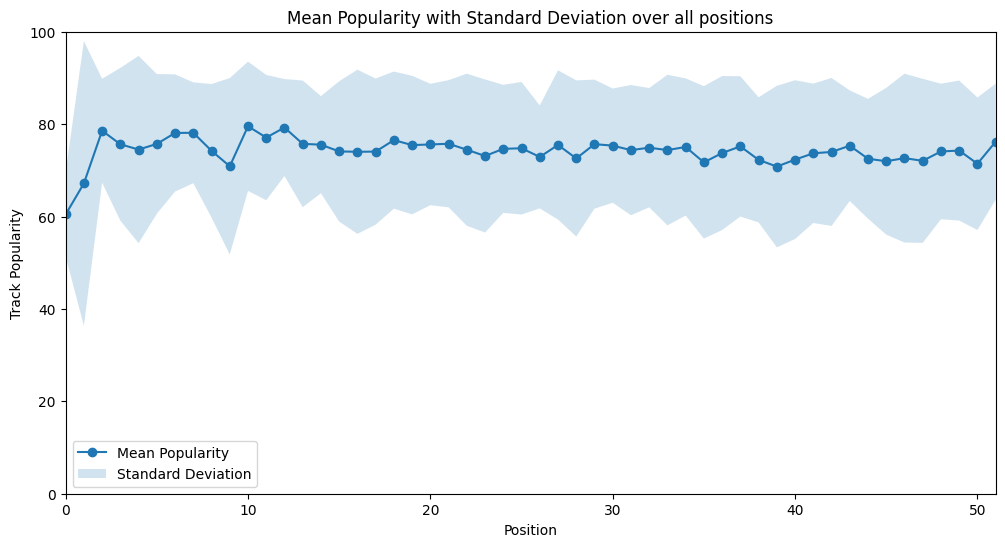

In [10]:
plt.figure(figsize=(12, 6))

# Plot the mean line and points
plt.plot(positional_df['position'], positional_df['popularity_mean'], marker='o', label='Mean Popularity')

# Plot the error bands (mean +/- std)
plt.fill_between(
    positional_df['position'], 
    positional_df['popularity_mean'] - positional_df['popularity_std'], 
    positional_df['popularity_mean'] + positional_df['popularity_std'], 
    alpha=0.2, 
    label='Standard Deviation'
)
# x axis limits
plt.xlim(0, 51)
plt.ylim(0, 100)
plt.xlabel('Position')
plt.ylabel('Track Popularity')
plt.title('Mean Popularity with Standard Deviation over all positions')
plt.legend()
plt.show()

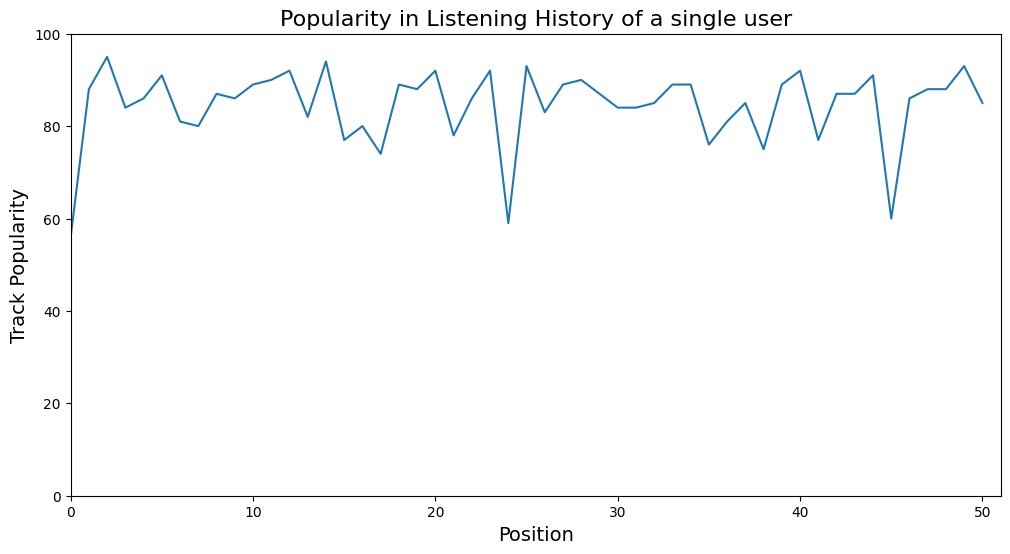

In [12]:
figure, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='position', y='popularity', data=sample, ax = ax)
# x axis limits
plt.xlim(0, 51)
plt.ylim(0, 100)
ax.set_title('Popularity in Listening History of a single user', fontsize=16)
ax.set_ylabel('Track Popularity', fontsize=14)
ax.set_xlabel('Position', fontsize=14)
plt.show()

### Shows, popularity is time independent

In [13]:
df[df['acousticness'].isna() | df['danceability'].isna() | df['energy'].isna() | df['instrumentalness'].isna() | df['liveness'].isna() | df['loudness'].isna() | df['speechiness'].isna() | df['tempo'].isna() | df['valence'].isna()].shape

(273, 23)

### There are 273 songs, which do not have songs features.
1) Should we just remove.
2) Include them by some research or from other resources. (complicated)
3) Is it belong to a specific user or participant?

In [15]:
df.isna().sum() # (4572, 24) : 4572 - 273 = 4299 non na rows
# 273/4572 = 0.06 # 6% of the data is missing some audio features

# Number of the row with NA values
df.isna().any(axis=1).sum() #273

np.int64(273)

(4299, 23)

# 1) 'First Genre' : a grouping variable
### See how each audio feature changes over the positions

In [ ]:
dataset_1 = df.copy()
dataset_1 = dataset_1.dropna().reset_index(drop=True)
dataset_1.shape # (4299, 24)

(4299, 16)

In [27]:
dataset_1.keys()
# drop the columns
dataset_1 = dataset_1.drop(columns=['played_at', 'duration_ms'])
dataset_1.shape # (4299, 22)
dataset_1.head()

position  explicit                track_id              track_name  \
0         0     False  7p6oXzBSPAXXz8Xb8gBPki  Subzero - Original Mix   
1         0     False  3ENHpbTuY72FukZbwGP6bc               Tear Away   
2         0     False  7p6oXzBSPAXXz8Xb8gBPki  Subzero - Original Mix   
3         0     False  1lK5iIMKifrxERzS3iimJH           Breathe on Me   
4         0     False  3ENHpbTuY72FukZbwGP6bc               Tear Away   

   popularity  first_genre                                               user  \
0          45            3            19befa2d20a544b3819a1236cf7536c4_Harsh1   
1          67            4            24bebb12512f476a8e08b14a1aaa08ea_Hannah   
2          45            3  6f0f1e2e101f4f208ede37b241d6fc4c_31owtsxu6xlbj...   
3          56            1                    f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c   
4          67            4          b32e896539eb4b25856361076a3d14c1_Emily_01   

  gender  age  acousticness  ...  energy  instrumentalness  key  liveness  \
0      F   20       0.58800  ...   0.608            0.8610  6.0    0.0991   
1      F   40       0.00055  ...   0.648            0.0028  0.0    0.0846   
2      M   20       0.58800  ...   0.608            0.8610  6.0    0.0991   
3      M   20       0.00209  ...   0.565            0.0125  5.0    0.0901   
4      F   20       0.00055  ...   0.648            0.0028  0.0    0.0846   

   loudness  mode  speechiness    tempo  valence          artist  
0   -11.638   0.0       0.0673  124.988    0.118       Ben Klock  
1    -4.579   1.0       0.0441  132.983    0.457   Drowning Pool  
2   -11.638   0.0       0.0673  124.988    0.118       Ben Klock  
3    -6.395   0.0       0.0471  112.203    0.571  Britney Spears  
4    -4.579   1.0       0.0441  132.983    0.457   Drowning Pool  

[5 rows x 21 columns]

In [29]:
# count the number of songs per 'first_genre'
dataset_1['first_genre'].value_counts() / 50

first_genre
4    18.36
5    17.28
3    17.26
2    16.88
1    16.20
Name: count, dtype: float64

In [41]:
dataset_1['mode'].unique()

array([0., 1.])

In [31]:
audio_features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'key', 'liveness', 'loudness', 'mode', 
    'speechiness', 'tempo', 'valence'
]



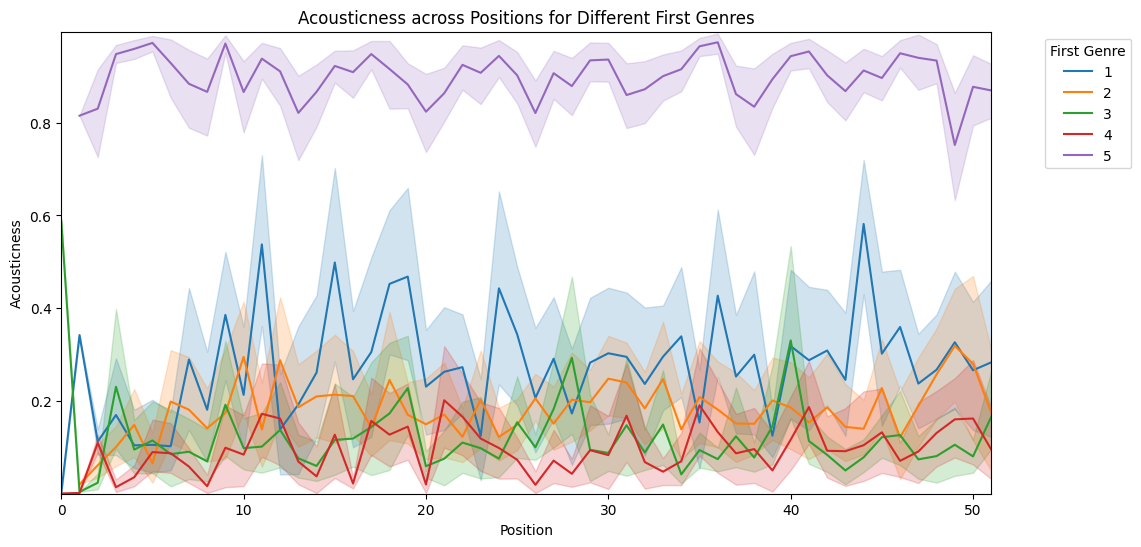

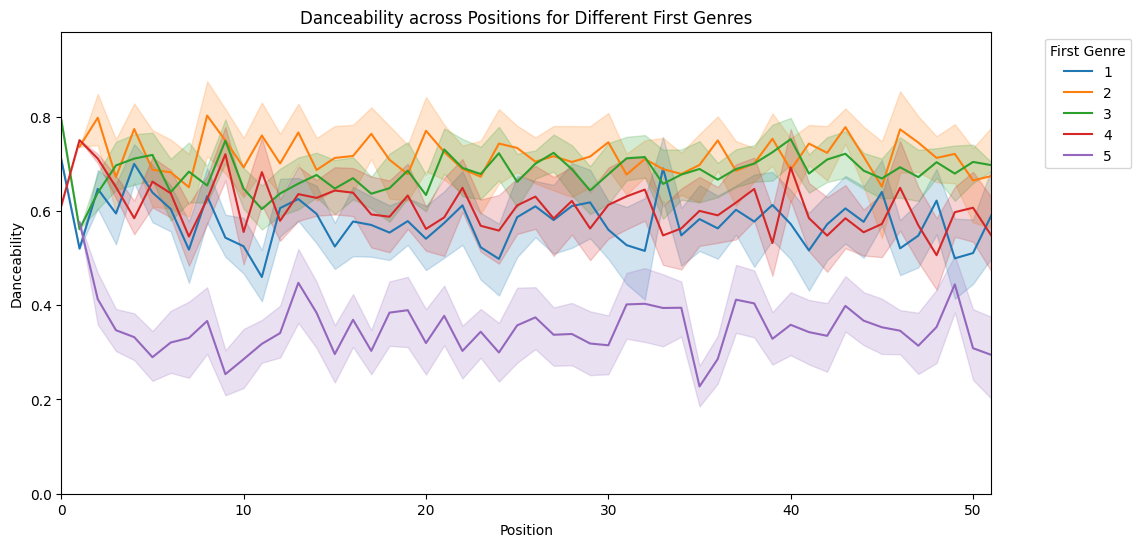

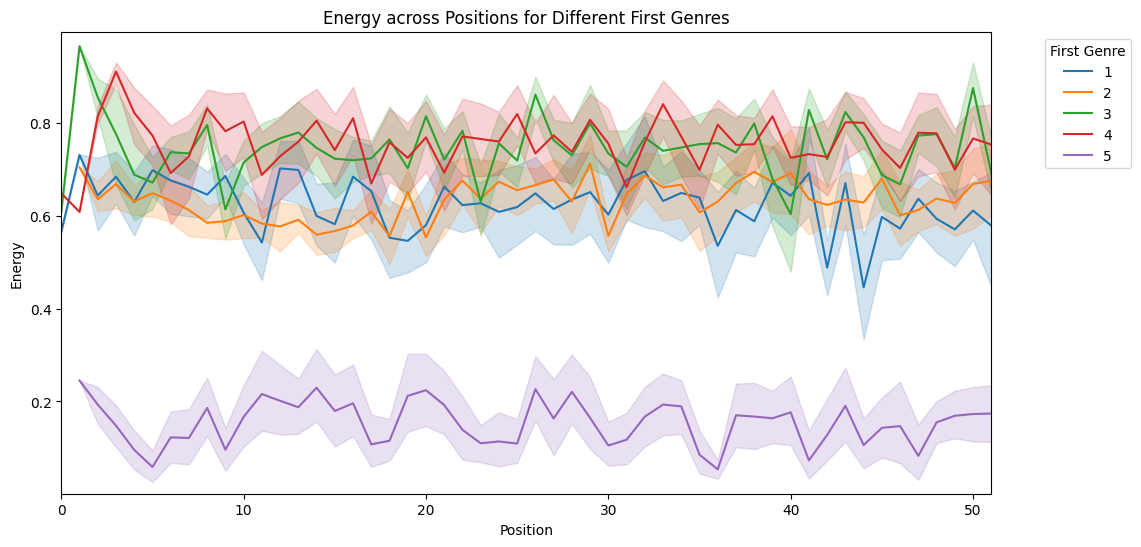

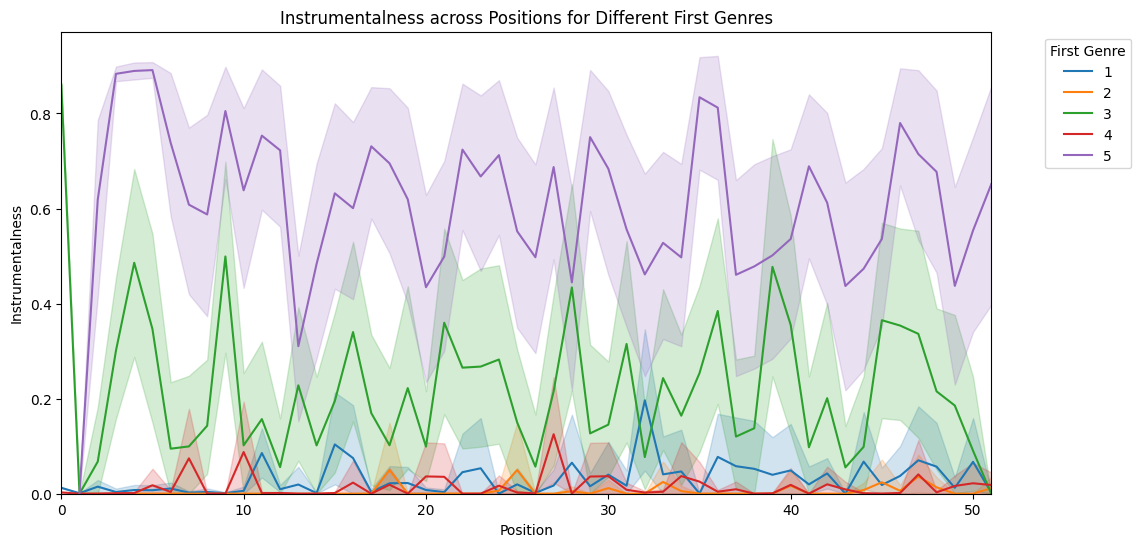

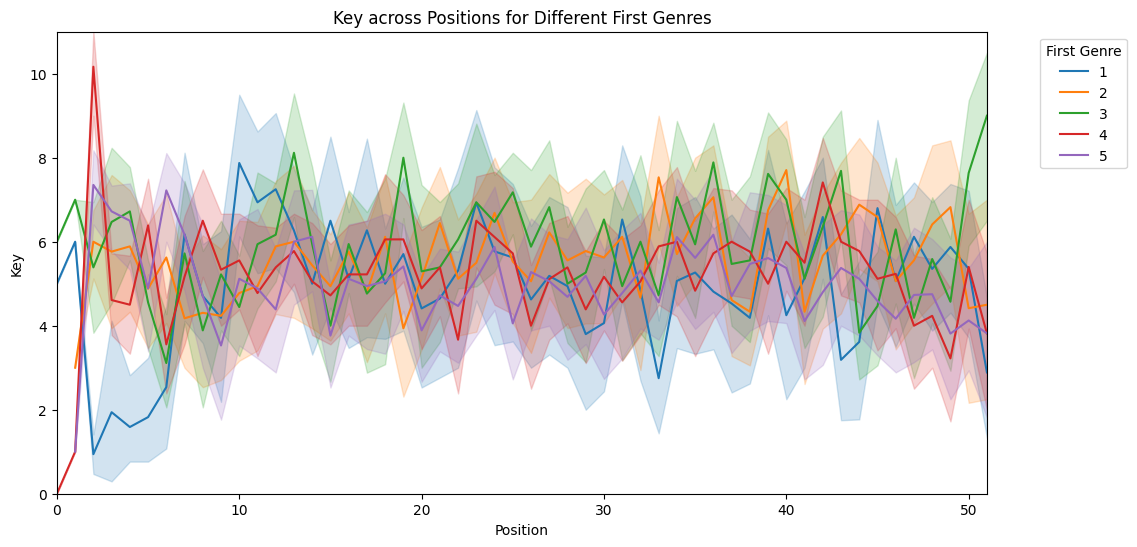

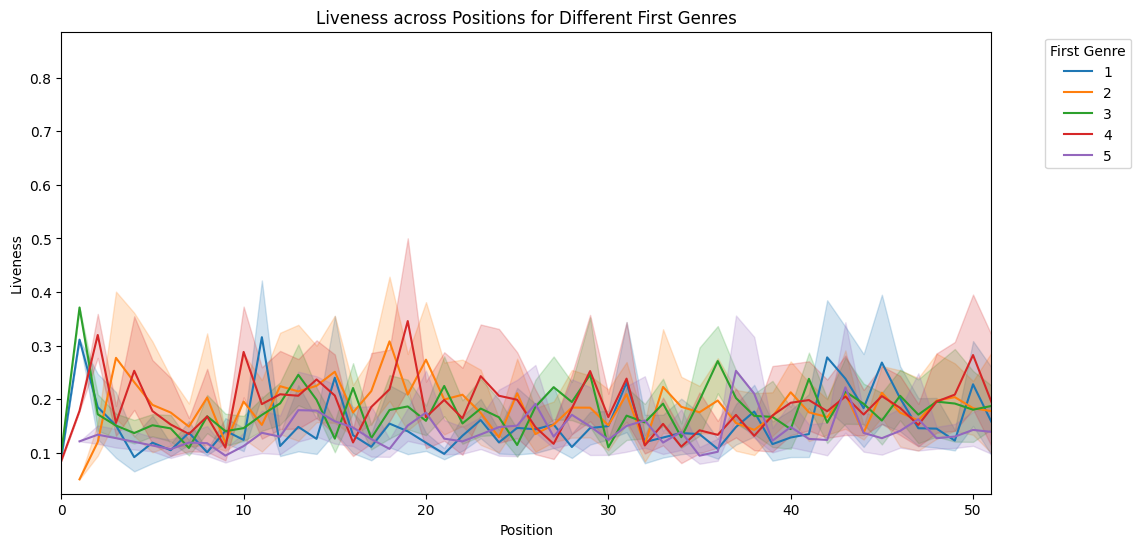

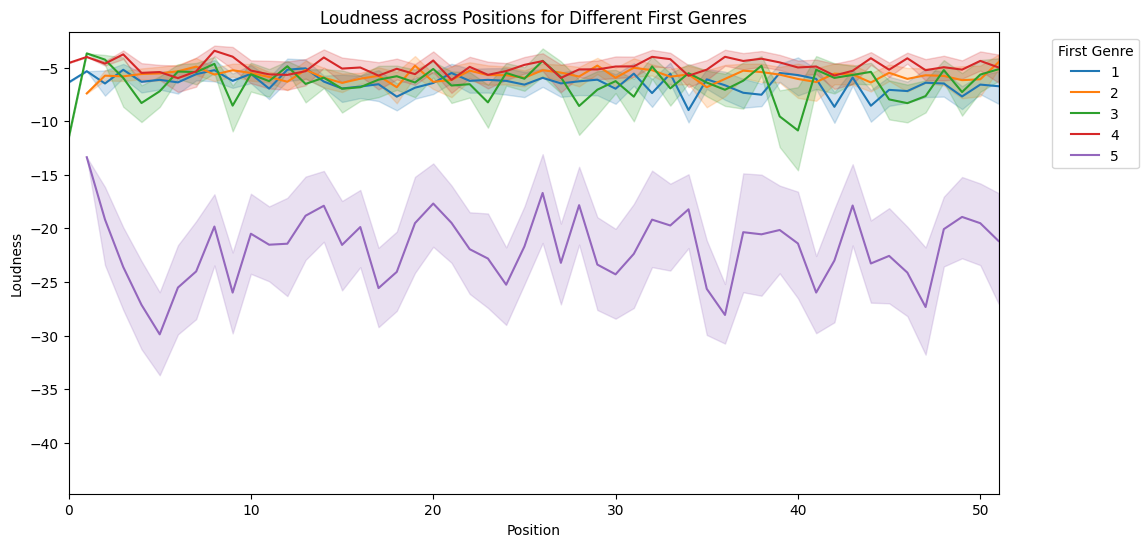

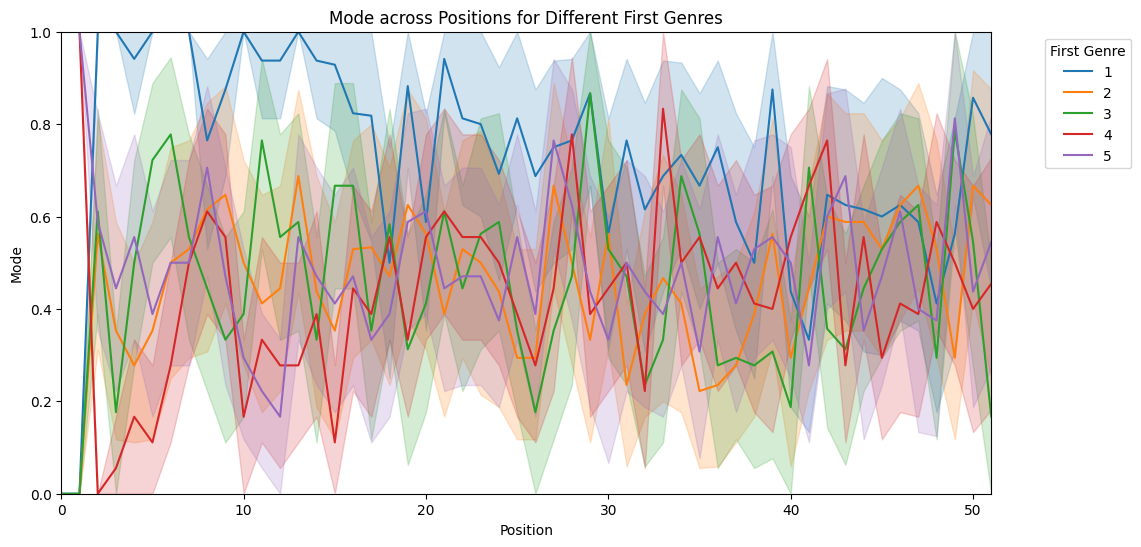

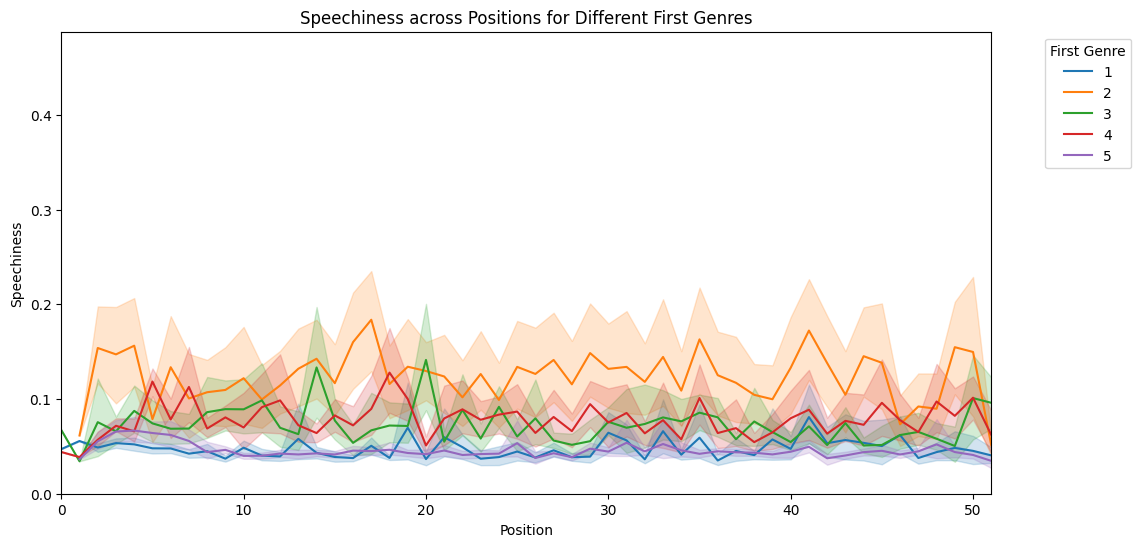

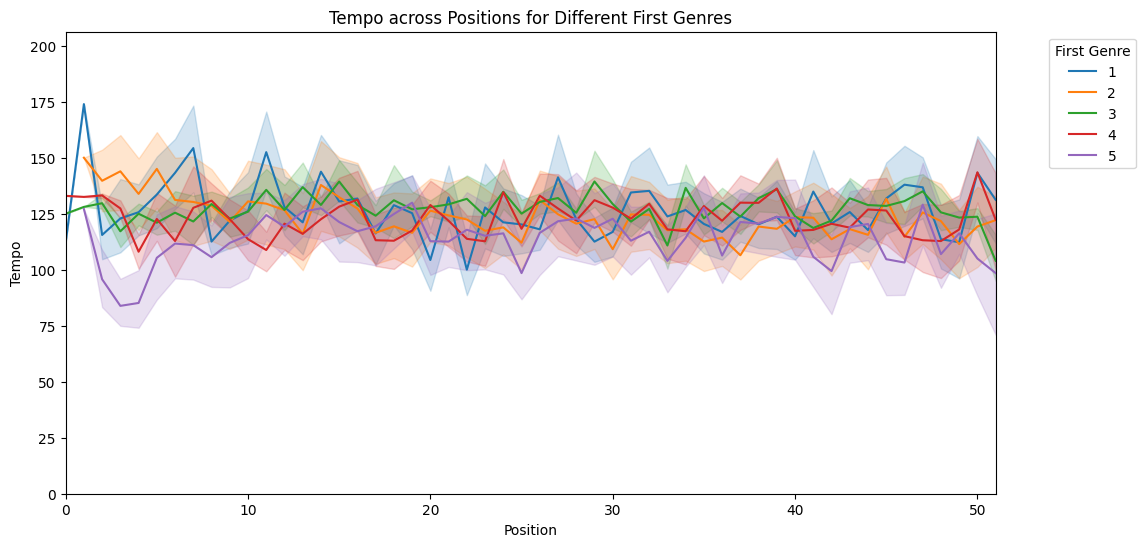

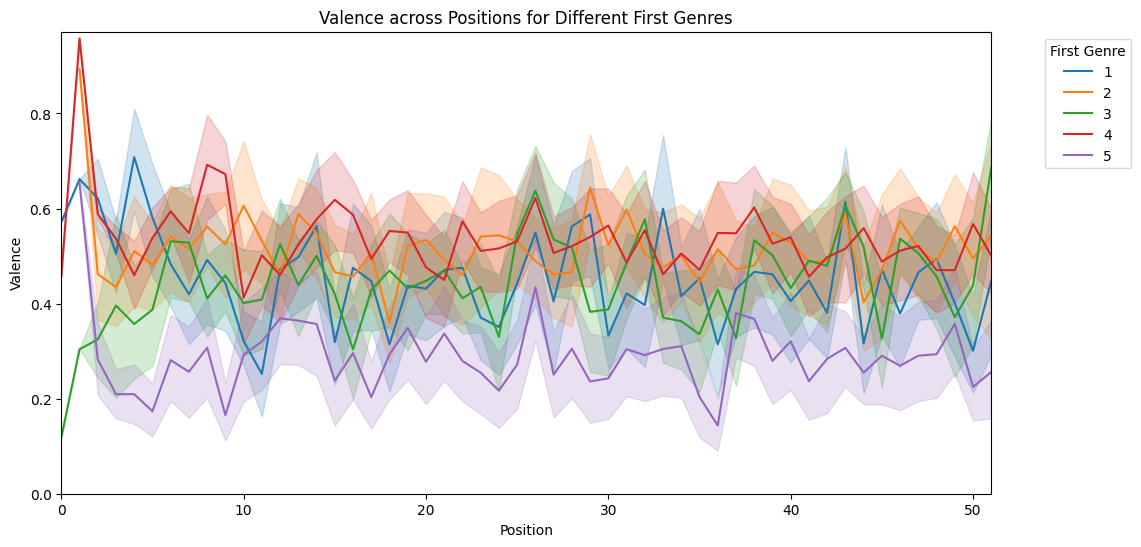

In [37]:

for feature in audio_features:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='position', y=feature, hue='first_genre', data=dataset_1, palette='tab10')
    plt.xlim(0, 51)
    plt.ylim(dataset_1[feature].min(), dataset_1[feature].max())
    plt.title(f'{feature.capitalize()} across Positions for Different First Genres')
    plt.xlabel('Position')
    plt.ylabel(feature.capitalize())
    plt.legend(title='First Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# 2) Distance based, Audio features as a vector

In [122]:
# Feature separation
continuous_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
categorical_features = ['key', 'mode']
audio_features = continuous_features + categorical_features

# Clean data
dataset_1_clean = dataset_1[audio_features + ['position', 'first_genre', 'user']].dropna(subset=audio_features)
dataset_1_clean[audio_features] = dataset_1_clean[audio_features].astype(float)

In [126]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()   
dataset_1_clean[continuous_features] = scaler.fit_transform(dataset_1_clean[continuous_features])

In [127]:
from sklearn.metrics.pairwise import cosine_similarity

def user_drift_analysis(session):
    """Per-user: distances from genre-specific dual seeds"""
    session = session.sort_values('position').reset_index(drop=True)
    if len(session) < 3:
        return pd.DataFrame()
    
    # FIXED: User's seed genre (same for all 48 songs)
    user_seed_genre = int(session.iloc[0]['first_genre'])  # Genre 1-5 for this user
    
    # Dual seeds: pos 0+1 (guaranteed same genre)
    seeds = session[session['position'] <= 1]
    seed_cont = np.mean(seeds[continuous_features].values, axis=0).reshape(1, -1)
    seed_cat  = np.mean(seeds[categorical_features].values, axis=0).reshape(1, -1)
    
    results = []
    # All 48 post-seed songs
    for _, song in session[session['position'] > 1].iterrows():
        song_cont = song[continuous_features].values.reshape(1, -1)
        song_cat  = song[categorical_features].values.reshape(1, -1)
        
        cont_drift = 1 - cosine_similarity(seed_cont, song_cont)[0, 0]
        cat_drift  = 1 - cosine_similarity(seed_cat, song_cat)[0, 0]
        total_drift = 1 - cosine_similarity(
            np.mean(seeds[audio_features].values, axis=0).reshape(1, -1),
            song[audio_features].values.reshape(1, -1)
        )[0, 0]
        
        results.append({
            'user': song['user'],
            'position': int(song['position']),  # 2-49
            'user_seed_genre': user_seed_genre,  # FIXED: User's genre (1-5)
            'cont_drift': float(cont_drift),
            'cat_drift': float(cat_drift),
            'total_drift': float(total_drift)
        })
    
    return pd.DataFrame(results)


In [ ]:
# Generate: 89 users × 48 songs
user_drifts = [user_drift_analysis(group) for _, group in dataset_1_clean.groupby('user')]

all_user_drifts = pd.concat([df for df in user_drifts if len(df) > 0], ignore_index=True)

print(f"Final Dataset: {len(all_user_drifts)} rows ({all_user_drifts['user'].nunique()} users)")
print("\nFirst 5 rows:")
print(all_user_drifts.head())
print("\nGenres per user (should be 1 each):")
print(all_user_drifts.groupby('user')['user_seed_genre'].nunique().value_counts())
print("\nShape:", all_user_drifts.shape)

Final Dataset: 4157 rows (89 users)

First 5 rows:
                                             user  position  user_seed_genre  \
0  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         2                3   
1  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         3                3   
2  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         4                3   
3  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         5                3   
4  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         6                3   

   cont_drift  cat_drift  total_drift  
0    0.824714   0.000000     0.448779  
1    0.149522   0.000000     0.009167  
2    0.321476   0.010051     0.055497  
3    1.192065   0.105573     0.320938  
4    1.389224   0.000000     0.766568  

Genres per user (should be 1 each):
user_seed_genre
1    89
Name: count, dtype: int64


(4157, 6)

In [192]:
all_user_drifts.to_csv('89_user_48_song_drifts.csv', index=False)
print("💾 Saved: 89_user_48_song_drifts.csv")
print("\nColumns:", all_user_drifts.columns.tolist())
print("\nQuick stats by user_seed_genre:")
print(all_user_drifts.groupby('user_seed_genre')['total_drift'].agg(['mean', 'std', 'count']).round(3))


💾 Saved: 89_user_48_song_drifts.csv

Columns: ['user', 'position', 'user_seed_genre', 'cont_drift', 'cat_drift', 'total_drift']

Quick stats by user_seed_genre:
                  mean    std  count
user_seed_genre                     
1                0.318  0.320    776
2                0.339  0.208    826
3                0.226  0.283    827
4                0.632  0.160    882
5                0.479  0.099    846


user  position  \
0   d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...         2   
1   d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...         3   
2   d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...         4   
3   d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...         5   
4   d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...         6   
5   d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...         7   
6   d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...         8   
7   d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...         9   
8   d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        10   
9   d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        11   
10  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        12   
11  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        13   
12  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        14   
13  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        15   
14  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        16   
15  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        18   
16  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        19   
17  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        20   
18  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        21   
19  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        22   
20  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        23   
21  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        25   
22  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        26   
23  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        27   
24  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        28   
25  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        29   
26  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        30   
27  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        31   
28  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        32   
29  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        33   
30  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        34   
31  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        35   
32  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        36   
33  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        37   
34  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        38   
35  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        39   
36  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        40   
37  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        41   
38  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        42   
39  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        43   
40  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        44   
41  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        46   
42  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        47   
43  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        48   
44  d5d9baabb48d4c09959ab4abef8cb54a_AnirudhParame...        49   

    user_seed_genre  cont_drift  cat_drift  total_drift  
0                 1    1.025845   0.105573     0.262805  
1                 1    0.646569   1.000000     0.925336  
2                 1    0.544380   1.000000     0.906405  
3                 1    0.470096   0.292893     0.525206  
4                 1    0.253500   0.292893     0.472336  
5                 1    0.778003   0.004963     0.069404  
6                 1    0.924612   0.019419     0.089061  
7                 1    0.966356   0.292893     0.504440  
8                 1    1.294104   0.004963     0.054982  
9                 1    0.987756   0.006116     0.142326  
10                1    0.533085   0.004963     0.027642  
11                1    0.642001   0.007722     0.040651  
12                1    0.255861   0.105573     0.308240  
13                1    1.244456   0.004963     0.058981  
14                1    0.362505   0.292893     0.552926  
15                1    1.407489   0.00

📊 Stats preview:
   position  user_seed_genre      mean       std  count
0         2                1  0.622020  0.327464     17
1         2                2  0.222829  0.110716     16
2         2                3  0.218098  0.260119     18
3         2                4  0.663886  0.049803     18
4         2                5  0.501741  0.050315     17
Genres: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Positions: 2 → 51


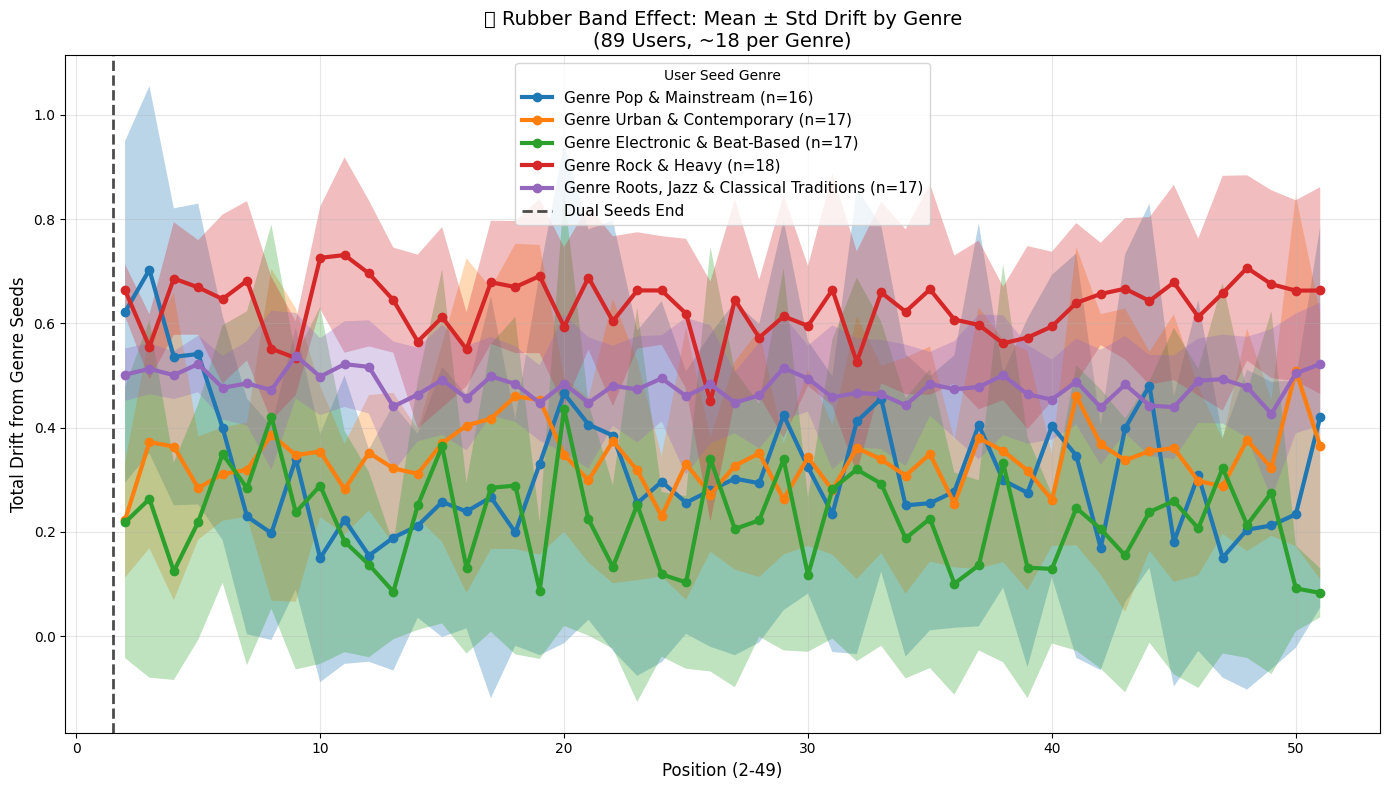

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

genre_list = ["Pop & Mainstream", "Urban & Contemporary", "Electronic & Beat-Based", "Rock & Heavy", "Roots, Jazz & Classical Traditions"]

# Load your saved data
all_user_drifts = pd.read_csv('89_user_48_song_drifts.csv')

# Calculate mean + std by position and genre (~18 users per genre)
drift_stats = all_user_drifts.groupby(['position', 'user_seed_genre'])['total_drift'].agg(['mean', 'std', 'count']).reset_index()

print("📊 Stats preview:")
print(drift_stats.head())
print(f"Genres: {sorted(all_user_drifts['user_seed_genre'].unique())}")
print(f"Positions: {all_user_drifts['position'].min()} → {all_user_drifts['position'].max()}")

# Plot: Mean ± 1 std, ~18 users per genre per position
plt.figure(figsize=(14, 8))
for genre in sorted(all_user_drifts['user_seed_genre'].unique()):
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    plt.plot(genre_data['position'], genre_data['mean'], 
             marker='o', linewidth=3, label=f'Genre {genre_list[int(genre)-1]} (n={genre_data["count"].mean():.0f})')
    
    # Shaded std region
    plt.fill_between(genre_data['position'], 
                     genre_data['mean'] - genre_data['std'], 
                     genre_data['mean'] + genre_data['std'], 
                     alpha=0.3)

plt.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
plt.xlabel('Position (2-49)', fontsize=12)
plt.ylabel('Total Drift from Genre Seeds', fontsize=12)
plt.title('🎯 Rubber Band Effect: Mean ± Std Drift by Genre\n(89 Users, ~18 per Genre)', fontsize=14)
plt.legend(title='User Seed Genre', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

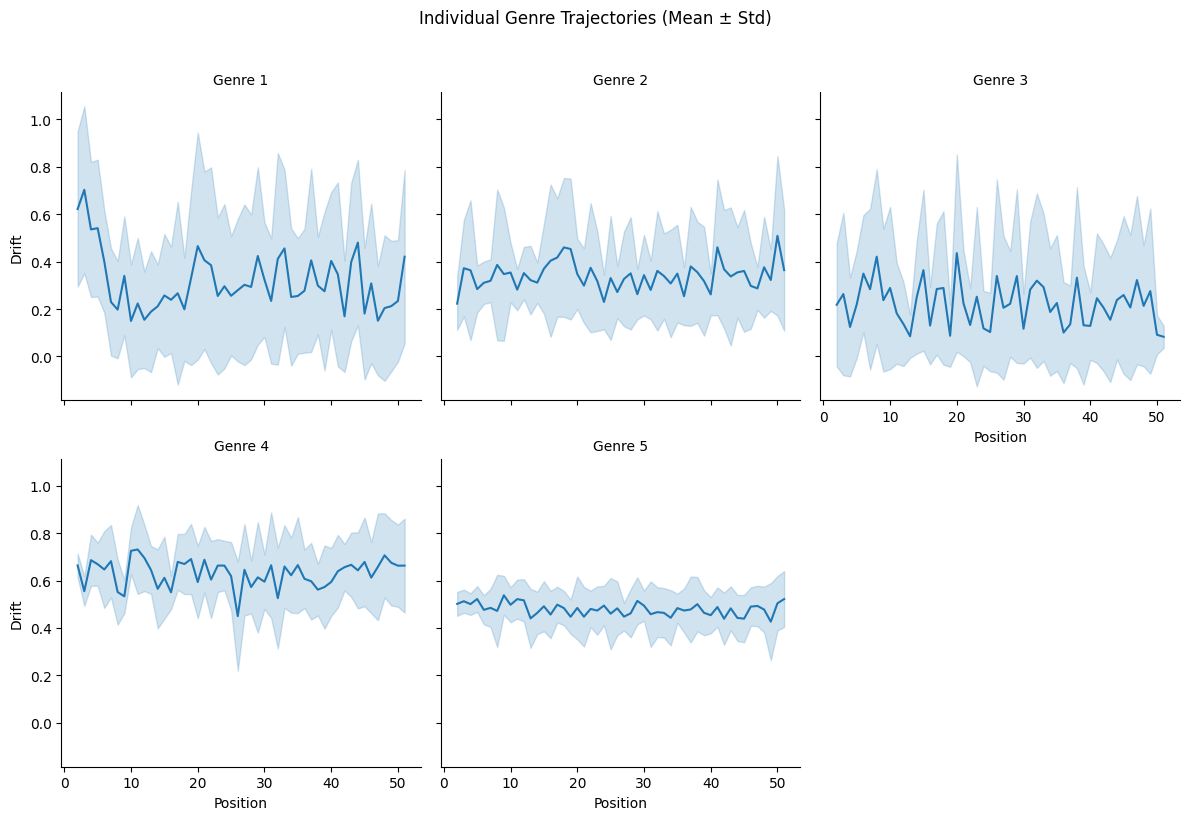

In [ ]:
# Bonus: Separate panels per genre
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(all_user_drifts, col='user_seed_genre', col_wrap=3, height=4)
g.map(sns.lineplot, 'position', 'total_drift', errorbar='sd')
g.set_titles('Genre {col_name}')
g.set_xlabels('Position')
g.set_ylabels('Drift')
g.fig.suptitle('Individual Genre Trajectories (Mean ± Std)', y=1.02)
plt.tight_layout()
plt.show()


# 2) VAR

In [156]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VAR as VARModel

In [158]:
# Sort once
dataset_1_clean = dataset_1_clean.sort_values(['user', 'position']).reset_index(drop=True)

In [176]:
window = dataset_1_clean[dataset_1_clean['position'] <= 55].copy()

In [ ]:
seeds = (
    window[window['position'] <= 1]
    .groupby(['user', 'first_genre'])[continuous_features]
    .mean()
    .reset_index()
)
seeds = seeds.rename(columns={f: f + '_seed' for f in continuous_features})


user  first_genre  \
0   0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
1        0f547591ab654965b1a2369a42034e4b_Ömercan1            5   
2          19befa2d20a544b3819a1236cf7536c4_Harsh1            3   
3     2173664479e34723b4d8214fe1d8efc4_Selim Salim            4   
4   23aada40ba9e4409a6609a7efe0343fc_Julie Andrews            1   
..                                             ...          ...   
84      f01e1d6dbc6f46ef87bc7054ba34481a_Jaya Lara            3   
85        f131564c8f17444c8e0dd7274c994ddc_Harshh3            3   
86       f47677960ad044819291b0a57cae6c84_Ömercan3            5   
87    f97edba5f25d4d58b473921b397a2b0a_Kamil Kemal            4   
88                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c            1   

    acousticness_seed  danceability_seed  energy_seed  instrumentalness_seed  \
0           -0.044887           0.475250     0.755164               0.730129   
1            1.386437          -0.060281    -1.265201              -0.513179   
2           -0.044887           0.475250     0.755164               0.730129   
3           -0.857809           0.493809     0.163792              -0.509136   
4           -0.386445           0.143857     0.238413              -0.493670   
..                ...                ...          ...                    ...   
84          -0.044887           0.475250     0.755164               0.730129   
85          -0.044887           0.475250     0.755164               0.730129   
86           1.386437          -0.060281    -1.265201              -0.513179   
87          -0.857809           0.493809     0.163792              -0.509136   
88          -0.386445           0.143857     0.238413              -0.493670   

    liveness_seed  loudness_seed  speechiness_seed  tempo_seed  valence_seed  
0        0.501162       0.179158         -0.357859    0.123993     -0.962703  
1       -0.365699      -0.538108         -0.581062    0.142895      0.832522  
2        0.501162       0.179158         -0.357859    0.123993     -0.962703  
3       -0.287412       0.601664         -0.503561    0.334684      1.049327  
4        0.238938       0.403983         -0.348559    0.683688      0.680556  
..            ...            ...               ...         ...           ...  
84       0.501162       0.179158         -0.357859    0.123993     -0.962703  
85       0.501162       0.179158         -0.357859    0.123993     -0.962703  
86      -0.365699      -0.538108         -0.581062    0.142895      0.832522  
87      -0.287412       0.601664         -0.503561    0.334684      1.049327  
88       0.238938       0.403983         -0.348559    0.683688      0.680556  

[89 rows x 11 columns]

In [184]:
pd.set_option('display.max_rows', None)

In [186]:
ts_list = []
for user, group in window.groupby('user'):
    ts = group[continuous_features + ['position']].set_index('position').sort_index()
    if len(ts) < 5:  # skip very short sessions
        continue
    ts['user'] = user
    ts_list.append(ts)

ts_df = pd.concat(ts_list)

ts_df[0:150]

acousticness  danceability    energy  instrumentalness  liveness  \
position                                                                     
0             0.760508      1.090316  0.089171          1.973417 -0.532155   
1            -0.850281     -0.139816  1.421157         -0.513158  1.534480   
2            -0.757440      0.496460  0.484663         -0.513179  0.477980   
3            -0.819481      0.178322  1.510703          0.517849  0.113146   
4            -0.860629      1.583430  0.119020          2.042730 -0.535195   
5            -0.850364     -0.293582  0.742106         -0.509713 -0.061671   
6             0.741206      1.259990  0.253338         -0.513179 -0.577759   
7             0.280721      0.851713 -0.224237         -0.513179 -0.441706   
8            -0.857368      0.077579  1.215949         -0.512676 -0.373300   
9            -0.532712      0.279066 -0.190658         -0.513179 -0.628684   
10           -0.496865      0.565389  0.477201         -0.513179  0.318365   
11           -0.815069     -0.320093  0.936120         -0.513179  0.607192   
12           -0.622879     -0.595813  0.488394         -0.513102 -0.259289   
13           -0.736483      1.164549  1.152521         -0.513098  1.496476   
14           -0.856706     -0.139816  1.066707         -0.513171  0.584390   
15           -0.334179      0.443437  1.324150         -0.513179  0.979627   
16           -0.794389      1.026689 -0.108575          2.094714  0.067542   
18            1.041763      1.254688  0.010819         -0.512876 -0.152879   
19           -0.430688     -0.288280  1.062976         -0.497641 -0.251689   
20           -0.673615      0.088183  0.757030         -0.079974 -0.320095   
21            0.195241      0.687342  0.544360         -0.513179  1.739699   
22           -0.814242      1.381943  0.883886         -0.512015 -0.554197   
23           -0.843829     -0.224652  0.339152         -0.507489  0.303164   
24           -0.856899     -0.394326  0.544360         -0.512903 -0.603602   
25           -0.775638     -0.224652  0.730912         -0.513045 -0.656047   
26           -0.715803      0.369205  1.230874         -0.513161 -0.456908   
27           -0.723524      0.157113  0.189910         -0.513137 -0.038868   
28           -0.857643      1.519802  1.062976         -0.506305 -0.038868   
29           -0.782808      0.151811  1.062976         -0.513179 -0.798940   
30           -0.860321      0.528273  0.592863          2.019625 -0.585360   
31            1.576698      1.222874 -1.254008          2.195795 -0.502512   
32           -0.648247      1.196362  0.160061         -0.511400 -0.289692   
33           -0.201824      0.676738  0.077978         -0.513138  0.151149   
34           -0.853755      0.125299  0.645098         -0.513179 -0.844544   
35           -0.604955      1.753103  0.092902         -0.513179 -0.228886   
36           -0.620948     -0.139816  1.283108          2.068722  1.238052   
37           -0.797698      0.454041  1.365191         -0.275494  1.739699   
38           -0.383812      0.549483  1.256991         -0.513179  1.230451   
39           -0.565800     -0.118606  0.193641         -0.513150  2.112134   
42           -0.414144      1.122130  0.007088         -0.513173  0.181552   
43           -0.850805      0.904736  1.227142         -0.512979  0.181552   
44           -0.234913      0.109392  0.111557         -0.513167 -0.092074   
45           -0.765160      0.008649  1.451006         -0.510450  2.134936   
46           -0.524439      0.104090  0.637636         -0.513179 -0.190883   
47           -0.853094      0.241950  1.462199         -0.513142  1.618088   
48           -0.641077      0.358600  0.656291         -0.513179  0.987228   
50           -0.563043      0.644924  0.742106         -0.513060 -0.502512   
51            0.222815      0.618412  0.186179         -0.513087 -0.561798   
1             1.386437     -0.060281 -1.265201         -0.513179 -0.365699   
2             1.777988     -0.83

In [172]:
maxlag = 2  # try 1, 2, 3
results = []

for genre in sorted(window['first_genre'].unique()):
    genre_users = seeds[seeds['first_genre'] == genre]['user'].unique()
    for user in genre_users:
        # get user time series
        user_ts = ts_df[ts_df['user'] == user][continuous_features]
        if len(user_ts) < 5:
            continue

        # get seed values for this user (from earlier seeds df)
        user_seed_row = seeds[seeds['user'] == user].iloc[0]
        seed_dict = {f: user_seed_row[f + '_seed'] for f in continuous_features}

        for feat in continuous_features:
            x = np.full(len(user_ts), seed_dict[feat])   # repeated seed
            y = user_ts[feat].values                      # observed future

            data = np.column_stack([x, y])
            try:
                gc_res = grangercausalitytests(data, maxlag=maxlag, verbose=False)
                # collect min p‑value over lags for this user, feature, genre
                min_p = min(
                    [round(r[0]['ssr_ftest'][1], 6) for r in gc_res.values()]
                )
                results.append({
                    'user': user,
                    'genre': genre,
                    'feature': feat,
                    'min_p': min_p
                })
            except:
                continue


In [173]:
results_df = pd.DataFrame(results)

print("Per‑genre, per‑feature average p‑values (seed → feature):")
summary = (
    results_df.groupby(['genre', 'feature'])['min_p']
    .agg(['mean', 'count'])
    .round(4)
    .sort_values('mean')
)
print(summary)

print("\nFeatures most often predicted by seed (p < 0.05):")
sig = results_df[results_df['min_p'] < 0.05]
top_features = sig.groupby('feature').size().sort_values(ascending=False)
print(top_features.head(5))

print("\nGenres where seed has strongest predictive power (low p):")
top_genres = sig.groupby('genre').size().sort_values(ascending=False)
print(top_genres)


Per‑genre, per‑feature average p‑values (seed → feature):


KeyError: 'genre'

In [174]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

maxlag = 2
results = []

print("Dataset overview:")
print(f"Users: {window['user'].nunique()}")
print(f"Genres: {window['first_genre'].nunique()}")
print(f"Avg positions/user: {window.groupby('user')['position'].count().mean():.1f}")

print("\nSeeds computed:")
print(seeds.head())
print(f"Seeds shape: {seeds.shape}")

print("\nTime series prepared:")
print(f"ts_df shape: {ts_df.shape}")
print(ts_df.groupby('user')['position'].count().describe())

# Granger loop with DEBUG
for genre in sorted(window['first_genre'].unique()):
    print(f"\n--- Genre {genre} ---")
    genre_users = seeds[seeds['first_genre'] == genre]['user'].unique()
    print(f"Genre {genre}: {len(genre_users)} users with seeds")
    
    for i, user in enumerate(genre_users):
        if i % 10 == 0:
            print(f"  Processing user {i+1}/{len(genre_users)}: {user}")
            
        # get user time series (positions 2+)
        user_ts = ts_df[ts_df['user'] == user][continuous_features]
        if len(user_ts) < maxlag * 2:
            print(f"    Skip {user}: only {len(user_ts)} future positions")
            continue

        # get seed values for this user
        user_seed_row = seeds[seeds['user'] == user]
        if user_seed_row.empty:
            print(f"    Skip {user}: no seed row")
            continue
            
        user_seed_row = user_seed_row.iloc[0]
        seed_dict = {f: user_seed_row[f + '_seed'] for f in continuous_features}

        for feat in continuous_features:
            x = np.full(len(user_ts), seed_dict[feat])   # repeated seed value
            y = user_ts[feat].values                      # observed future

            # Check data quality
            if np.any(np.isnan(x)) or np.any(np.isnan(y)):
                continue
                
            data = np.column_stack([x, y])
            
            try:
                gc_res = grangercausalitytests(data, maxlag=maxlag, verbose=False)
                min_p = min([round(r[0]['ssr_ftest'][1], 6) for r in gc_res.values()])
                results.append({
                    'user': user,
                    'genre': genre,
                    'feature': feat,
                    'min_p': min_p,
                    'n_positions': len(user_ts)
                })
                print(f"    ✓ {user} {feat}: p={min_p:.4f}")
            except Exception as e:
                print(f"    ✗ {user} {feat}: {str(e)[:50]}")
                continue

print(f"\n✅ Granger tests complete. {len(results)} valid results collected.")


Dataset overview:
Users: 89
Genres: 5
Avg positions/user: 9.3

Seeds computed:
                                             user  first_genre  \
0  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
1       0f547591ab654965b1a2369a42034e4b_Ömercan1            5   
2         19befa2d20a544b3819a1236cf7536c4_Harsh1            3   
3    2173664479e34723b4d8214fe1d8efc4_Selim Salim            4   
4  23aada40ba9e4409a6609a7efe0343fc_Julie Andrews            1   

   acousticness_seed  danceability_seed  energy_seed  instrumentalness_seed  \
0          -0.044887           0.475250     0.755164               0.730129   
1           1.386437          -0.060281    -1.265201              -0.513179   
2          -0.044887           0.475250     0.755164               0.730129   
3          -0.857809           0.493809     0.163792              -0.509136   
4          -0.386445           0.143857     0.238413              -0.493670   

   liveness_seed  loudness_seed  speechiness_seed

KeyError: 'Column not found: position'